# Load Data and Do Processing
- Load data into a Pandas dataframe 
- Convert data into numoy array using .values
- Convert data from float64 to float32 for speed
- We reshape the input data from (n_train x 784) to (n_trnainx28x28)
- we normalize the pixel color values to interval [0,1]

In [15]:
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras import backend as K

K.set_image_dim_ordering('th') #input shape (channels, height, width)
train_df = pd.read_csv("train.csv")
valid_df = pd.read_csv("test.csv")

x_train = train_df.drop(['label'], axis = 1).values.astype('float32')
Y_train = train_df['label'].values.astype('float32')
x_valid = valid_df.values.astype('float32')

img_width, img_height = 28, 28

n_train = x_train.shape[0]
n_valid = x_valid.shape[0]

n_classes = 10

x_train = x_train.reshape(n_train, img_width, img_height)
x_train = x_train/255

x_valid = x_valid.reshape(n_valid, img_width, img_height)
x_valid = x_valid/255



When modeling multi-class classification problems using neural networks, it is good practice to reshape the output 
attribute from a vector that contains values for each class value to be a matrix with a boolean for each class value 
and whether or not a given instance has that class value or not. <https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science>

In [10]:
y_train = to_categorical(Y_train)

/Users/nitinsingh/anaconda/lib/python2.7/site-packages/keras/utils/np_utils.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y = np.zeros((len(y), nb_classes))
/Users/nitinsingh/anaconda/lib/python2.7/site-packages/keras/utils/np_utils.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.


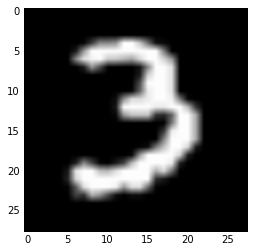

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
imgplot = plt.imshow(x_train[9,:,:], cmap = 'gray')